In [1]:
#Importing pandas as pd is not a must, but it is more or less a convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(pd.__version__)

0.23.0


## Intro

From pandas documention (https://pandas.pydata.org), "pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure"

pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

The main data structure in pandas is called DataFrame (2-dimensional). A DataFrame consists of one or more Series (1-dimensional). 

## Creating a pandas Series

A pandas Series is a 1-dimensional combination of sequence of values and a sequence of indices. 

In [2]:
#From list
first_series = pd.Series([100, 200, 300, 400, 500]) #Typing pd. and then clicking TAB shows you a list of methods
first_series

0    100
1    200
2    300
3    400
4    500
dtype: int64

In [3]:
type(first_series)

pandas.core.series.Series

In [6]:
first_series.values

array([100, 200, 300, 400, 500], dtype=int64)

In [7]:
first_series.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
print("Value on index 1: ", first_series[1])
print("All values after the 1 index: ", first_series.values[1:])

Value on index 1:  200
All values after the 1 index:  [200 300 400 500]


In [9]:
first_series.index = ['a', 'b', 'c', 'd', 'e']
first_series

a    100
b    200
c    300
d    400
e    500
dtype: int64

In [11]:
first_series['e']

500

In [12]:
apple_stock_dict = {
    "04/11/2019": 257.5,
    "05/11/2019": 257.13,
    "06/11/2019": 257.24,
    "07/11/2019": 259.43,
    "08/11/2019": 260.16,
}

apple_stock_series = pd.Series(apple_stock_dict)
apple_stock_series

04/11/2019    257.50
05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
08/11/2019    260.16
dtype: float64

In [13]:
apple_stock_series['05/11/2019':"08/11/2019"]

05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
08/11/2019    260.16
dtype: float64

## Creating a pandas Dataframe from Series

In [14]:
microsoft_stock_dict = {
    "04/11/2019": 144.55,
    "05/11/2019": 144.46,
    "06/11/2019": 144.06,
    "07/11/2019": 144.26,
    "08/11/2019": 145.96,
}

microsoft_stock_series = pd.Series(microsoft_stock_dict)
microsoft_stock_series

04/11/2019    144.55
05/11/2019    144.46
06/11/2019    144.06
07/11/2019    144.26
08/11/2019    145.96
dtype: float64

In [15]:
# Creating a DataFrame from Series
stocks_dataframe = pd.DataFrame({'apple': apple_stock_series, 'microsoft': microsoft_stock_series})
stocks_dataframe

,apple,microsoft
04/11/2019,257.50,144.55
05/11/2019,257.13,144.46
06/11/2019,257.24,144.06
07/11/2019,259.43,144.26
08/11/2019,260.16,145.96


In [16]:
stocks_dataframe.index

Index(['04/11/2019', '05/11/2019', '06/11/2019', '07/11/2019', '08/11/2019'], dtype='object')

In [19]:
stocks_dataframe.values

array([[257.5 , 144.55],
       [257.13, 144.46],
       [257.24, 144.06],
       [259.43, 144.26],
       [260.16, 145.96]])

In [20]:
stocks_dataframe.columns

Index(['apple', 'microsoft'], dtype='object')

In [21]:
stocks_dataframe.shape #First rows, then columns

(5, 2)

In [22]:
stocks_dataframe.dtypes

apple        float64
microsoft    float64
dtype: object

## Creating a DataFrame from an input file/source

Pandas has multiple top level reader functions that return a pandas object (Dataframe or Series). Full list here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Writing pd.read and pressing Tab gives you a full list of reader options. Clicking Shift+Tab within the brackets of read_excel(*here*) gives you access to the docstring

In [23]:
#Reading a local csv file:
titanic = pd.read_csv("titanic.csv") #Starting to write titanic and clicking TAB will autocomplete the name of the file (if existing in repository)

In [25]:
#Reading a txt/csv from the web. It works - just needs some finetuning 
pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 1: invalid start byte

In [67]:
#Same, but skip the explanations and specify value separation
boston = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt", skiprows=7, skipfooter=10, sep="\t")

C:\Users\arnaudok\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [36]:
#From an html source
wiki_tables = pd.read_html("https://en.wikipedia.org/wiki/Elections_in_Bulgaria")

In [37]:
#11 tables found on the link
len(wiki_tables)

11

In [38]:
election_results = wiki_tables[1]

In [39]:
election_results.head() #Not bad, but not great either

,0,1,2,3,4
0,Party,Votes,%,Seats,+/–
1,GERB,1072491,32.67,84,–13
2,BSP - Left Bulgaria,505527,15.40,39,–45
3,Movement for Rights and Freedoms,487134,14.84,38,+2
4,Reformist Bloc,291806,8.89,23,+23


In [63]:
pd.read_html("https://en.wikipedia.org/wiki/Elections_in_Bulgaria", header=0)[1]

ValueError: cannot skip rows starting from the end of the data (you passed a negative value)

In [42]:
col_names = election_results.iloc[0]

In [45]:
col_names

0    Party
1    Votes
2        %
3    Seats
4      +/–
Name: 0, dtype: object

In [46]:
election_results = election_results.iloc[1:,:]

In [48]:
election_results.head() #almost there

,0,1,2,3,4
1,GERB,1072491,32.67,84,–13
2,BSP - Left Bulgaria,505527,15.40,39,–45
3,Movement for Rights and Freedoms,487134,14.84,38,+2
4,Reformist Bloc,291806,8.89,23,+23
5,Patriotic Front,239101,7.28,19,+19


In [49]:
election_results.columns = col_names
election_results.head()

,Party,Votes,%,Seats,+/–
1,GERB,1072491,32.67,84,–13
2,BSP - Left Bulgaria,505527,15.40,39,–45
3,Movement for Rights and Freedoms,487134,14.84,38,+2
4,Reformist Bloc,291806,8.89,23,+23
5,Patriotic Front,239101,7.28,19,+19


In [50]:
election_results.shape

(29, 5)

## Data indexing and Selections

Pandas has two main types of multi-axis indexing.
- .loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found.
- .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics).

Getting values from an object with multi-axes selection uses the following notation (using .loc as an example, but the following applies to .iloc as well). Any of the axes accessors may be the null slice :. Axes left out of the specification are assumed to be :, e.g. p.loc['a'] is equivalent to p.loc['a', :, :].

In [51]:
stocks_dataframe.loc['04/11/2019':'07/11/2019', 'apple']

04/11/2019    257.50
05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
Name: apple, dtype: float64

In [52]:
#same as iloc. Remember about zero indexing
stocks_dataframe.iloc[0:4,0]

04/11/2019    257.50
05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
Name: apple, dtype: float64

### Accessing a column

In [54]:
stocks_dataframe['apple']

04/11/2019    257.50
05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
08/11/2019    260.16
Name: apple, dtype: float64

In [53]:
stocks_dataframe.apple # apple stock

04/11/2019    257.50
05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
08/11/2019    260.16
Name: apple, dtype: float64

In [55]:
stocks_dataframe.loc[:,'apple']

04/11/2019    257.50
05/11/2019    257.13
06/11/2019    257.24
07/11/2019    259.43
08/11/2019    260.16
Name: apple, dtype: float64

In [56]:
stocks_dataframe['apple'] is stocks_dataframe.loc[:,'apple']

True

### Accessing a row

In [57]:
stocks_dataframe.loc['04/11/2019']

apple        257.50
microsoft    144.55
Name: 04/11/2019, dtype: float64

In [59]:
stocks_dataframe.iloc[0:2]

,apple,microsoft
04/11/2019,257.50,144.55
05/11/2019,257.13,144.46


## Clean the data

In [60]:
election_results.info() #Note numerical columns mapped as objects, rather than int/float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 1 to 29
Data columns (total 5 columns):
Party    29 non-null object
Votes    28 non-null object
%        28 non-null object
Seats    28 non-null object
+/–      28 non-null object
dtypes: object(5)
memory usage: 1.2+ KB


### Why are columns such as number of Seats (obviously numerical) mapped as object?

In [62]:
election_results.Seats.unique() # see the '–'

array(['84', '39', '38', '23', '19', '15', '11', '0', '–', '240', nan],
      dtype=object)

In [69]:
election_results = election_results.replace('–', np.nan)

In [70]:
election_results.Votes.unique() #Pay attention to "11 583"

array(['1072491', '505527', '487134', '291806', '239101', '186938',
       '148262', '136223', '39221', '37335', '19990', '18901', '12628',
       '11 583', '10831', '9431', '7917', '7456', '7234', '7010', '5559',
       '5553', '5398', '4615', '3836', '218125', '3501269', '6858304',
       nan], dtype=object)

In [71]:
election_results.loc[14,'Votes'] = '11583'

In [72]:
election_results

,Party,Votes,%,Seats,+/–
1,GERB,1072491,32.67,84,–13
2,BSP - Left Bulgaria,505527,15.40,39,–45
3,Movement for Rights and Freedoms,487134,14.84,38,+2
4,Reformist Bloc,291806,8.89,23,+23
5,Patriotic Front,239101,7.28,19,+19
6,Bulgaria without Censorship,186938,5.69,15,New
7,Attack,148262,4.52,11,–12
8,Alternative for Bulgarian Revival,136223,4.15,11,New
9,Movement 21,39221,1.20,0,New
10,People's Voice,37335,1.14,0,0


In [73]:
for col in ['Votes', '%', 'Seats', '+/–']:
    election_results[col] = pd.to_numeric(election_results[col])

ValueError: Unable to parse string "–13" at position 0

In [74]:
election_results['+/–'].unique()

array(['–13', '–45', '+2', '+23', '+19', 'New', '–12', '0', nan],
      dtype=object)

In [75]:
election_results['+/–'] = election_results['+/–'].str.replace("–", "-").replace("New", np.nan)

In [76]:
election_results['+/–'] = pd.to_numeric(election_results['+/–'])

In [77]:
election_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 1 to 29
Data columns (total 5 columns):
Party    29 non-null object
Votes    28 non-null float64
%        27 non-null float64
Seats    26 non-null float64
+/–      11 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [78]:
election_results.describe()

,Votes,%,Seats,+/–
count,2.800000e+01,27.000000,26.000000,11.000000
mean,4.949885e+05,9.297778,18.461538,-2.363636
std,1.418761e+06,21.486130,49.037317,17.806026
min,3.836000e+03,0.120000,0.000000,-45.000000
25%,7.400500e+03,0.225000,0.000000,-6.000000
50%,1.944550e+04,0.580000,0.000000,0.000000
75%,2.233690e+05,6.485000,14.000000,1.000000
max,6.858304e+06,100.000000,240.000000,23.000000


In [79]:
election_results.Votes> 10_000

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27     True
28     True
29    False
Name: Votes, dtype: bool

In [81]:
#Show boolean indexing
election_results[election_results.Votes> 10_000]

,Party,Votes,%,Seats,+/–
1,GERB,1072491.0,32.67,84.0,-13.0
2,BSP - Left Bulgaria,505527.0,15.40,39.0,-45.0
3,Movement for Rights and Freedoms,487134.0,14.84,38.0,2.0
4,Reformist Bloc,291806.0,8.89,23.0,23.0
5,Patriotic Front,239101.0,7.28,19.0,19.0
6,Bulgaria without Censorship,186938.0,5.69,15.0,NaN
7,Attack,148262.0,4.52,11.0,-12.0
8,Alternative for Bulgarian Revival,136223.0,4.15,11.0,NaN
9,Movement 21,39221.0,1.20,0.0,NaN
10,People's Voice,37335.0,1.14,0.0,0.0


In [82]:
#Remove the bottom 3 rows
election_results = election_results.iloc[:-3,:]

In [83]:
test= np.arange(2,28)

In [84]:
test

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27])

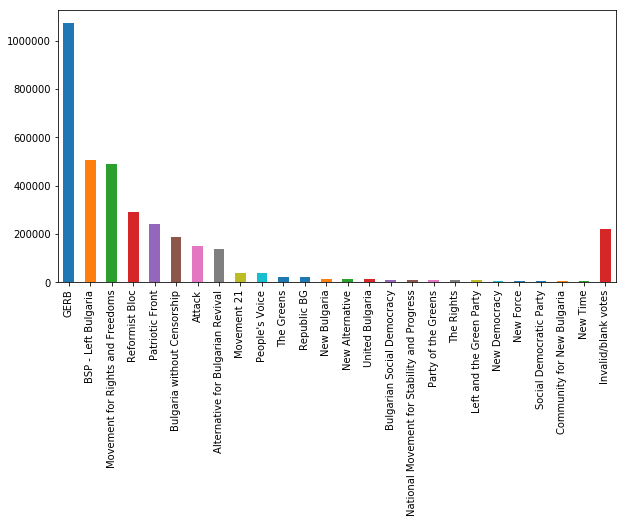

In [85]:
election_results.Votes.plot(kind='bar', figsize=(10, 5))
plt.xticks(range(len(election_results.Votes)), election_results.Party.values)
plt.show()